In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# **EDA**

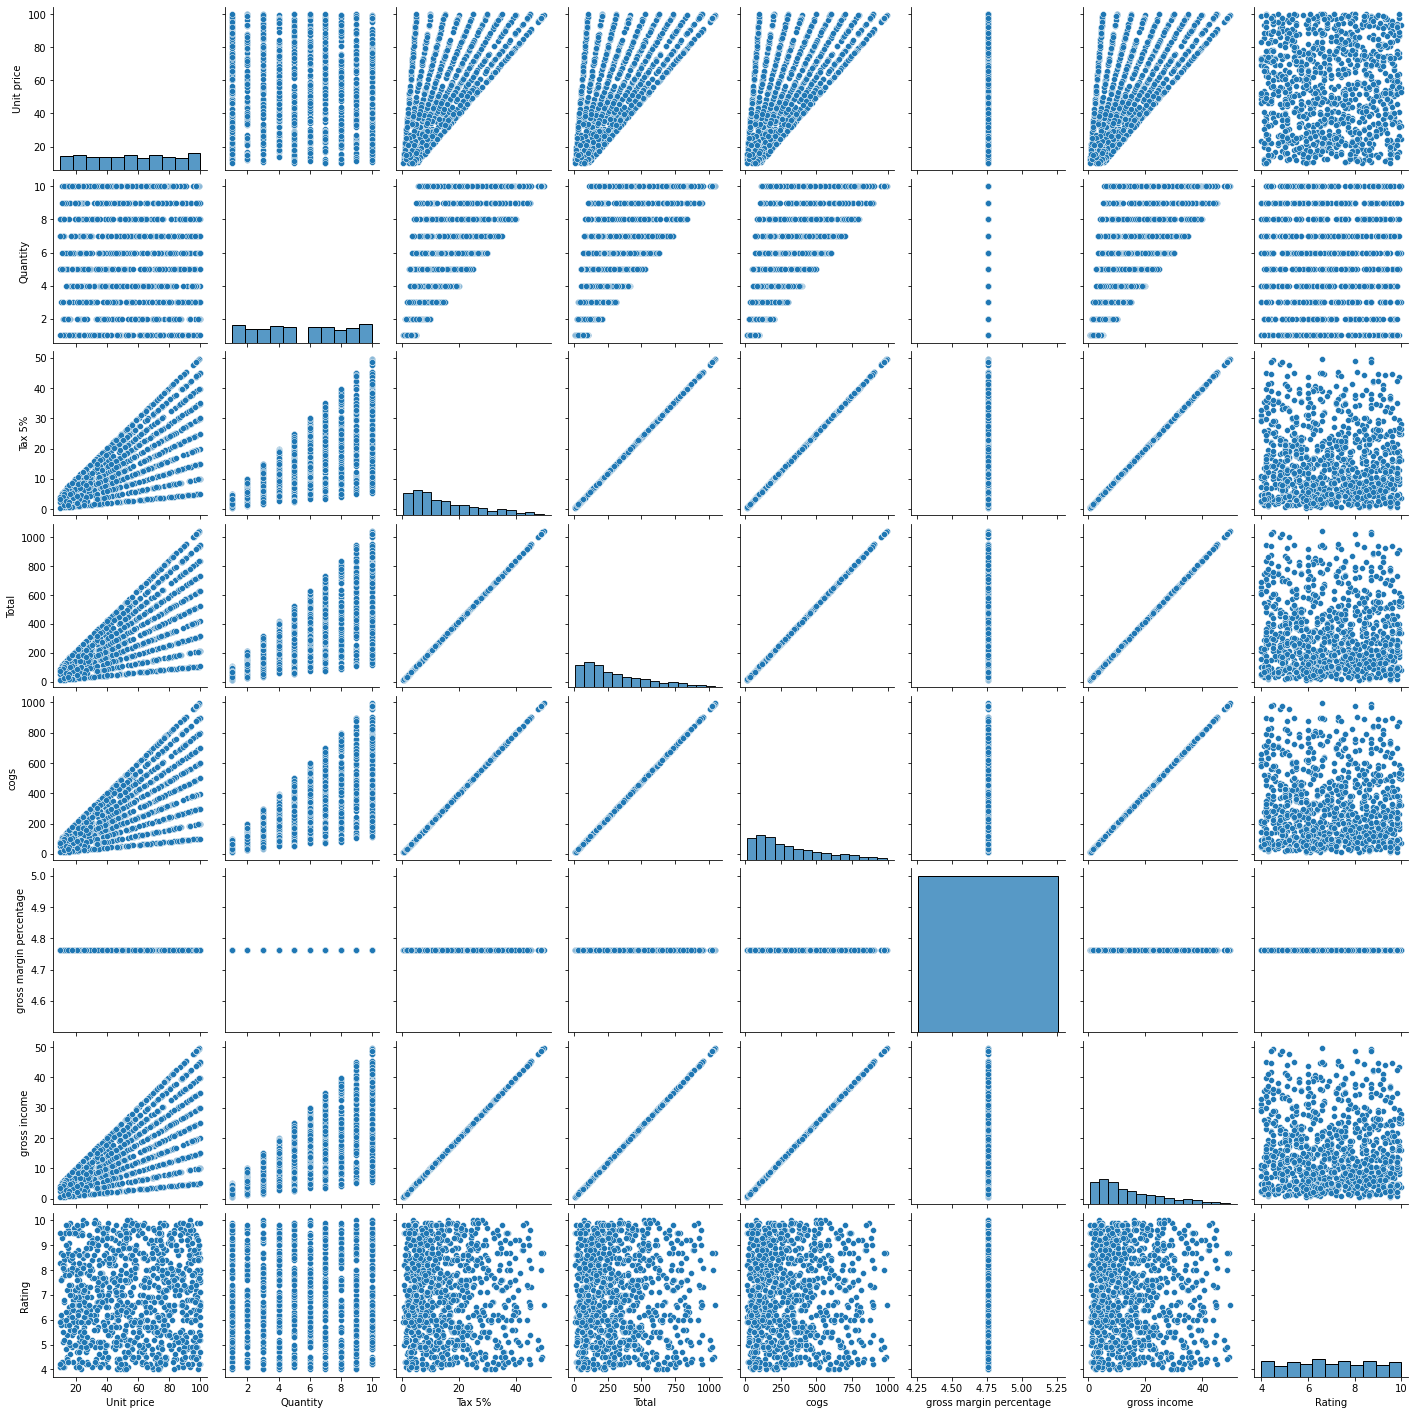

In [5]:
sns.pairplot(df)

1. **gross margin percentage** is the same for all records
2. **gross income** have a cor with **tax 5%**, **Total** and **cogs**
3. **Rating** dont have cor with all fields

# Exploring "Rating" #

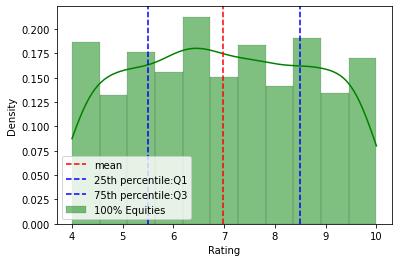

In [6]:
sns.histplot(df['Rating'], color="green", label="100% Equities", kde=True, stat="density", linewidth=.1, legend=True)
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='blue', ls='--', label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'], 75), c='blue', ls='--', label='75th percentile:Q3')
plt.legend()

In [7]:
df['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

Rating dont have correlation with all fields. Rating is contatant across the products, your value is about 7

# Exploring Branch and City #

In [8]:
df.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059


In [9]:
df.groupby('Branch').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866


<AxesSubplot:xlabel='City', ylabel='Total'>

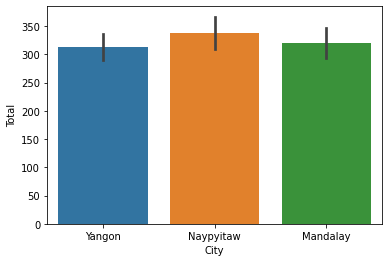

In [10]:
sns.barplot(x='City',y='Total',data=df)

<AxesSubplot:xlabel='Branch', ylabel='Total'>

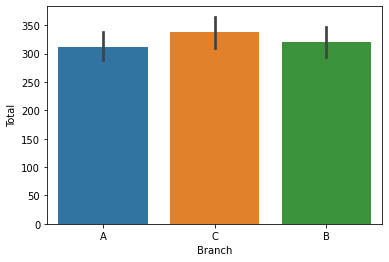

In [11]:
sns.barplot(x='Branch',y='Total',data=df)

Branch and City is the same. Probably I'll remove the Branch.

# Exploring Customer type and City #

In [12]:
df.groupby(['City', 'Customer type'])['Total'].count()

City       Customer type
Mandalay   Member           165
           Normal           167
Naypyitaw  Member           169
           Normal           159
Yangon     Member           167
           Normal           173
Name: Total, dtype: int64

In [13]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City', ylabel='count'>

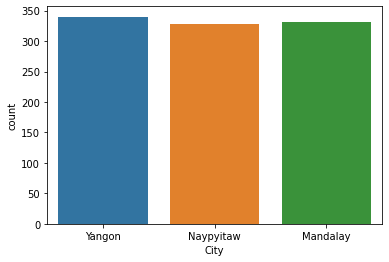

In [14]:
sns.countplot(df['City'])

In [15]:
df.City.value_counts().Naypyitaw, df.City.value_counts().Yangon, df.City.value_counts().Mandalay

(328, 340, 332)

The sales is the same in the three cities

# **Exploring Gender and Sales** #

In [16]:
dfgender = df.groupby(['Gender'], sort=False)['Gender','Total'].sum()
dfgender

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total
Gender,
Female,167882.925
Male,155083.824


In [17]:
df.groupby(['Gender'])['Gender','Quantity'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Quantity
Gender,
Female,2869
Male,2641


In [18]:
dfGender = df.groupby(['Gender'])['Total'].count()
dfGender

Gender
Female    501
Male      499
Name: Total, dtype: int64

In [19]:
df.groupby(['Gender'])['Total'].count()

Gender
Female    501
Male      499
Name: Total, dtype: int64

In [20]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

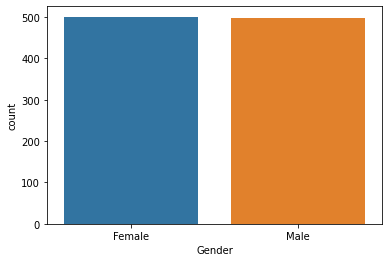

In [21]:
sns.countplot(df['Gender'])

## **Gender and Payment** ##

<AxesSubplot:xlabel='Gender', ylabel='Total'>

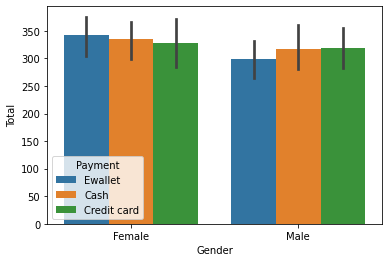

In [22]:
sns.barplot(x='Gender', y='Total', hue='Payment', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

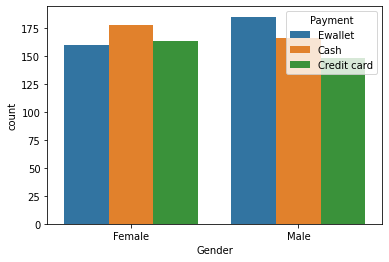

In [23]:

sns.countplot(data=df, x='Gender', hue='Payment')

In [24]:
df.groupby(['Gender', 'Payment'])['Total'].count()

Gender  Payment    
Female  Cash           178
        Credit card    163
        Ewallet        160
Male    Cash           166
        Credit card    148
        Ewallet        185
Name: Total, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

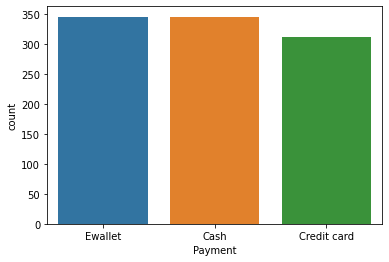

In [25]:
sns.countplot(data=df, x='Payment')

In [26]:
df.groupby(['Payment'])['Total'].count()

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Total, dtype: int64

> **Women prefers pays with cash and man with ewallet. Credit Card is important of course, but is the last choice.**

# **Exploring Product Line** #

In [27]:
df.groupby(['Product line'], sort=True)['Total','Quantity'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total,Quantity
Product line,,
Electronic accessories,54337.5315,971
Fashion accessories,54305.8950,902
Food and beverages,56144.8440,952
Health and beauty,49193.7390,854
Home and lifestyle,53861.9130,911
Sports and travel,55122.8265,920


In [28]:
df.groupby(['Product line', 'Gender']).agg({'Total': ['sum', 'count'], 'Quantity': ['sum']})

Total       Quantity
                                      sum count      sum
Product line           Gender                           
Electronic accessories Female  27102.0225    84      488
                       Male    27235.5090    86      483
Fashion accessories    Female  30437.4000    96      530
                       Male    23868.4950    82      372
Food and beverages     Female  33170.9175    90      514
                       Male    22973.9265    84      438
Health and beauty      Female  18560.9865    64      343
                       Male    30632.7525    88      511
Home and lifestyle     Female  30036.8775    79      498
                       Male    23825.0355    81      413
Sports and travel      Female  28574.7210    88      496
                       Male    26548.1055    78      424

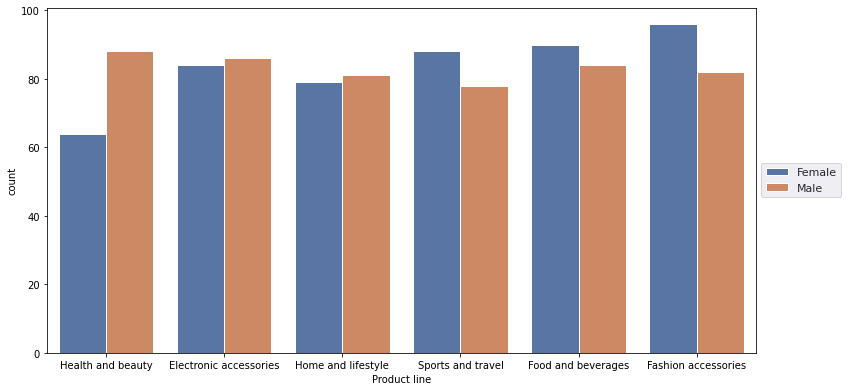

In [29]:
plotSize = (12.7, 6.35)
fig, ax = plt.subplots(figsize=plotSize)
sns.set(style="darkgrid")
sns.countplot(data=df, x='Product line',  hue='Gender')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

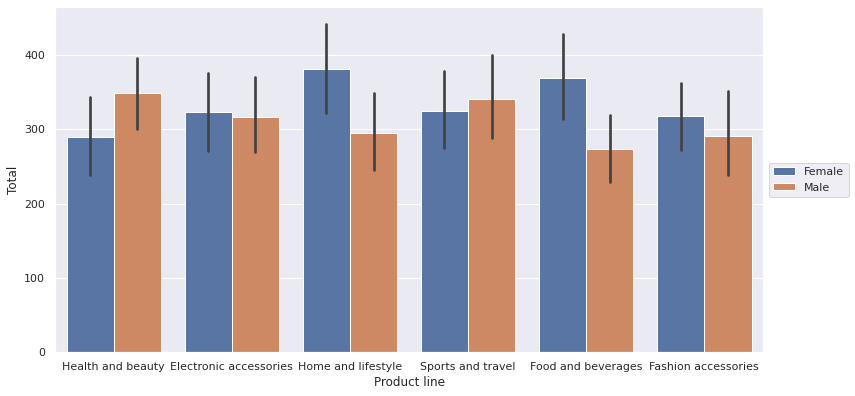

In [30]:
plotSize = (12.7, 6.35)
fig, ax = plt.subplots(figsize=plotSize)
sns.barplot(x='Product line', y='Total', hue='Gender', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [31]:
df.groupby(['Product line', 'Gender'], sort=True)['Quantity'].count()


Product line            Gender
Electronic accessories  Female    84
                        Male      86
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Female    64
                        Male      88
Home and lifestyle      Female    79
                        Male      81
Sports and travel       Female    88
                        Male      78
Name: Quantity, dtype: int64

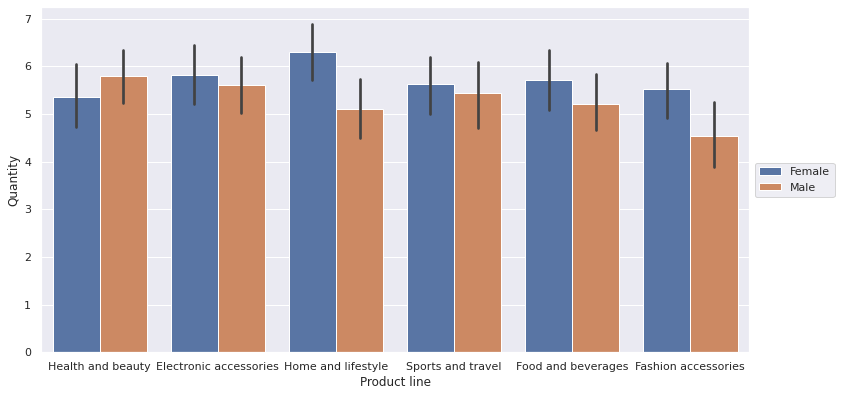

In [32]:
plotSize = (12.7, 6.35)
fig, ax = plt.subplots(figsize=plotSize)
sns.set(style="darkgrid")
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))